In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [60]:
tax_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [61]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv")
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


# **EDA**

In [62]:
# set column "Unnamed: 0" as index

tax_data = tax_data.set_index("Unnamed: 0", drop=True)
tax_data.index.name="TaxPayer"

test_data = test_data.set_index("Unnamed: 0", drop=True)
test_data.index.name="TaxPayer"

In [63]:
# index updated
tax_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
TaxPayer,,,,,,,,,,
61,183414,-12402,1,2,28,1,0,0,1,Democrat
501,129786,700251,2,5,63,3,0,0,0,Republican
658,268343,493411,2,4,44,1,1,0,1,Independent
703,290506,-433408,1,1,28,5,1,0,1,Republican
702,90108,907135,1,3,57,5,1,1,0,Democrat


In [64]:
# index updated
test_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
TaxPayer,,,,,,,,,
17,253274,-633752,2,1,94,3,0,1,1
590,47107,322850,0,1,30,2,1,1,0
224,111874,300583,0,2,46,3,0,1,1
960,96670,107419,0,3,77,5,0,0,0
57,128669,341273,0,0,92,4,1,1,1


In [65]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 61 to 635
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             803 non-null    int64 
 1   HHDL            803 non-null    int64 
 2   Married         803 non-null    int64 
 3   CollegGrads     803 non-null    int64 
 4   AHHAge          803 non-null    int64 
 5   Cars            803 non-null    int64 
 6   Filed in 2017   803 non-null    int64 
 7   Filed in 2016   803 non-null    int64 
 8   Filed in 2015   803 non-null    int64 
 9   PoliticalParty  803 non-null    object
dtypes: int64(9), object(1)
memory usage: 69.0+ KB


In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 17 to 528
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHI            201 non-null    int64
 1   HHDL           201 non-null    int64
 2   Married        201 non-null    int64
 3   CollegGrads    201 non-null    int64
 4   AHHAge         201 non-null    int64
 5   Cars           201 non-null    int64
 6   Filed in 2017  201 non-null    int64
 7   Filed in 2016  201 non-null    int64
 8   Filed in 2015  201 non-null    int64
dtypes: int64(9)
memory usage: 15.7 KB


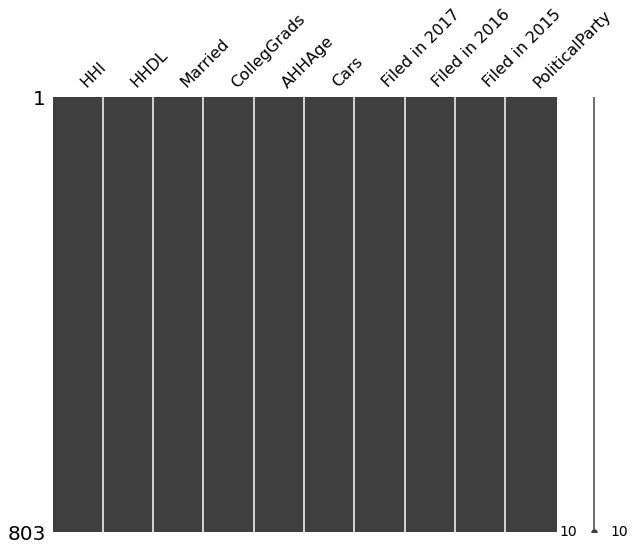

In [67]:
# no missing values
msno.matrix(tax_data, figsize=(10, 8))

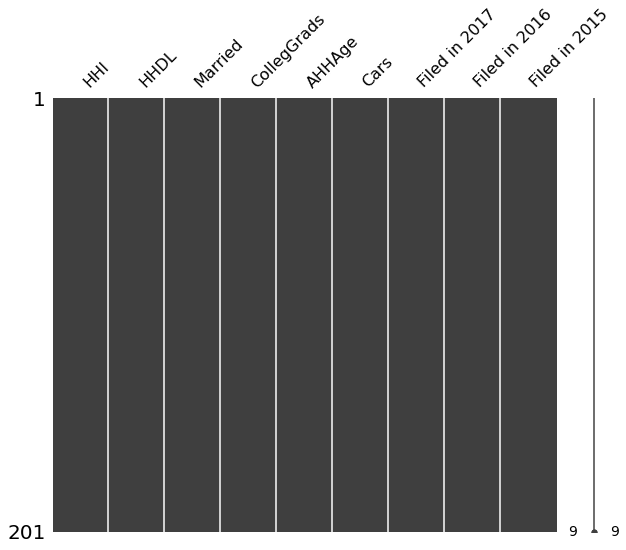

In [68]:
# no missing values
msno.matrix(test_data, figsize=(10, 8))

In [69]:
# information for numerical attributes
tax_data.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [70]:
# information for cetegorical attribute
tax_data["PoliticalParty"].describe()

count          803
unique           3
top       Democrat
freq           269
Name: PoliticalParty, dtype: object

In [71]:
test_data.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


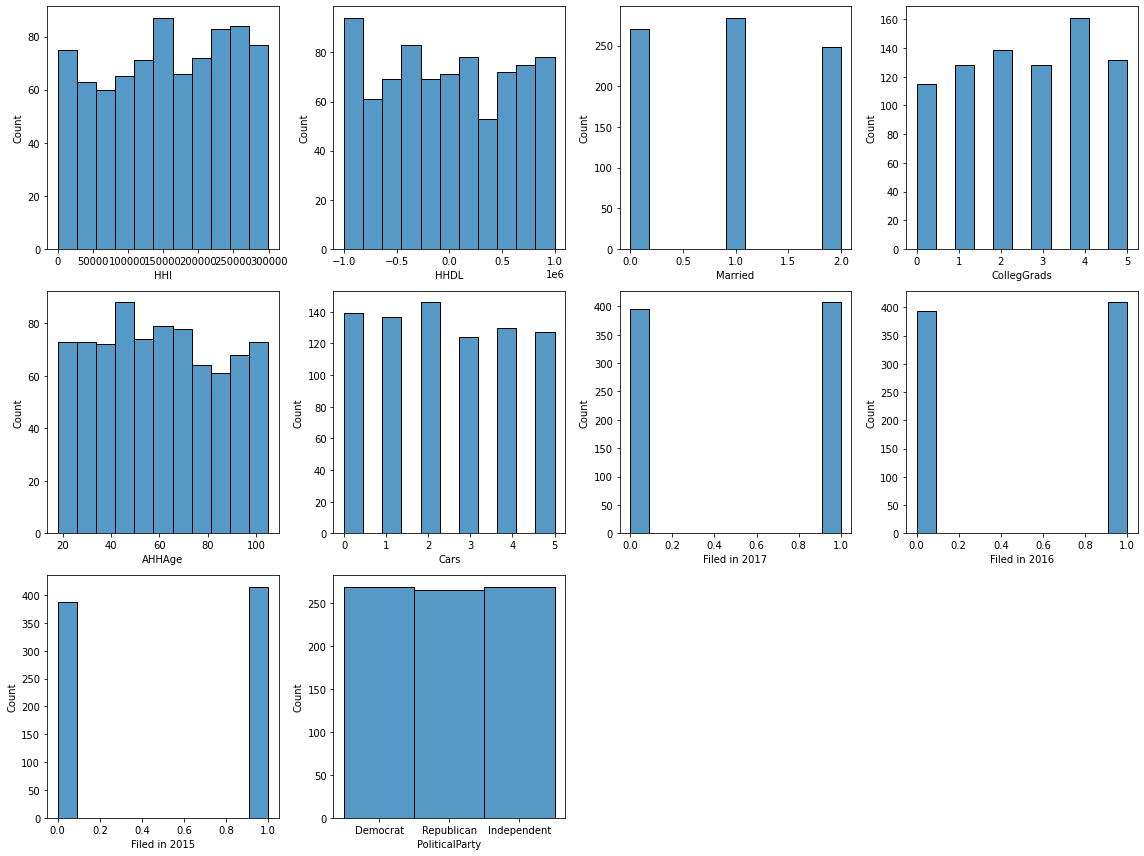

In [72]:
# scatter plot of all attributes in tax_data

plt.figure(figsize=(16, 12))
n_plots = len(tax_data.columns)
n_cols = 4
n_rows = n_plots // n_cols + 1

for idx, col in enumerate(tax_data.columns):
  ax = plt.subplot(n_rows, n_cols, idx+1)
  sns.histplot ( data=tax_data, x = tax_data.columns[idx], ax = ax)

plt.tight_layout()

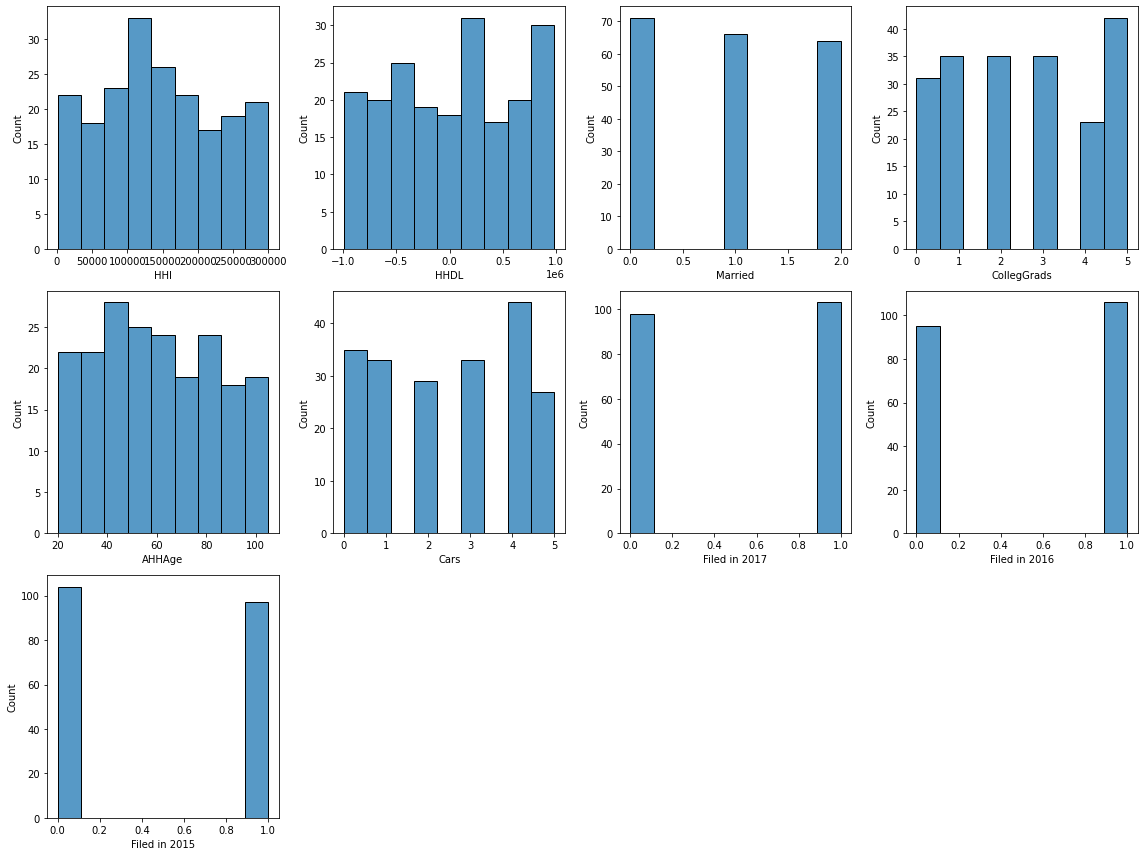

In [73]:
# scatter plot of all attributes in test_data

plt.figure(figsize=(16, 12))
n_plots = len(test_data.columns)
n_cols = 4
n_rows = n_plots // n_cols + 1

for idx, col in enumerate(test_data.columns):
  ax = plt.subplot(n_rows, n_cols, idx+1)
  sns.histplot ( data=test_data, x = test_data.columns[idx], ax = ax)

plt.tight_layout()

In [74]:
# number of unique values of each attribute
for col in tax_data.columns:
  print("{} has {} unique values".format(col, tax_data[col].nunique()))

print()

for col in test_data.columns:
  print("{} has {} unique values".format(col, test_data[col].nunique()))

HHI has 802 unique values
HHDL has 803 unique values
Married has 3 unique values
CollegGrads has 6 unique values
AHHAge has 88 unique values
Cars has 6 unique values
Filed in 2017 has 2 unique values
Filed in 2016 has 2 unique values
Filed in 2015 has 2 unique values
PoliticalParty has 3 unique values

HHI has 201 unique values
HHDL has 201 unique values
Married has 3 unique values
CollegGrads has 6 unique values
AHHAge has 75 unique values
Cars has 6 unique values
Filed in 2017 has 2 unique values
Filed in 2016 has 2 unique values
Filed in 2015 has 2 unique values


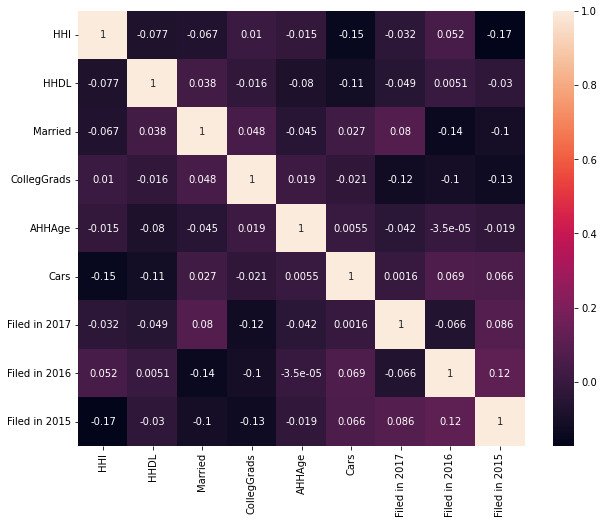

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(test_data.corr(), annot=True)

In [76]:
# list out the unique values of political party
tax_data["PoliticalParty"].value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

# **Pre-Processing**

In [77]:
# convert categorical values to numerical values in PoliticalParty column
# Democrat -> 0
# Independent  -> 1
# Republican -> 2

tax_data["PoliticalParty"].replace(to_replace=["Democrat", "Independent", "Republican"], 
                                   value=[0, 1, 2], 
                                   inplace =True)

tax_data["PoliticalParty"].value_counts()

0    269
1    269
2    265
Name: PoliticalParty, dtype: int64

In [78]:
# to validate that PoliticalPart column became numerical attribute
tax_data["PoliticalParty"].dtype

dtype('int64')

In [79]:
# normalize the values in all columns except PoliticalParty
from sklearn.preprocessing import StandardScaler

X = tax_data.drop("PoliticalParty", axis = 1)
y = tax_data["PoliticalParty"]

scaler = StandardScaler()
tax_data.iloc[:, :-1] = scaler.fit_transform(tax_data.iloc[:, :-1].to_numpy())
tax_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
TaxPayer,,,,,,,,,,
61,0.322956,0.004958,0.035650,-0.362938,-1.299476,-0.843396,-1.013794,-1.018858,0.966923,0
501,-0.295347,1.203070,1.280308,1.428697,0.097417,0.331360,-1.013794,-1.018858,-1.034209,2
658,1.302144,0.855331,1.280308,0.831485,-0.660896,-0.843396,0.986394,-1.018858,0.966923,1
703,1.557672,-0.702837,0.035650,-0.960150,-1.299476,1.506117,0.986394,-1.018858,0.966923,2
702,-0.752815,1.550883,0.035650,0.234274,-0.142050,1.506117,0.986394,0.981491,-1.034209,0


In [80]:
test_data.iloc[:, :] = scaler.fit_transform(test_data.iloc[:, :].to_numpy())
test_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
TaxPayer,,,,,,,,,
17,1.288712,-1.127932,1.263837,-0.892720,1.393200,0.299710,-1.025193,0.946692,1.035454
590,-1.188518,0.502492,-1.178771,-0.892720,-1.280547,-0.290895,0.975426,0.946692,-0.965760
224,-0.410301,0.464541,-1.178771,-0.315753,-0.612110,0.299710,-1.025193,0.946692,1.035454
960,-0.592987,0.135313,-1.178771,0.261214,0.682986,1.480919,-1.025193,-1.056309,-0.965760
57,-0.208498,0.533892,-1.178771,-1.469688,1.309646,0.890314,0.975426,0.946692,1.035454


In [81]:
# check the information of data again
tax_data.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,8.030000e+02,8.030000e+02,8.030000e+02,8.030000e+02,8.030000e+02,8.030000e+02,8.030000e+02,8.030000e+02,8.030000e+02,803.000000
mean,-1.647361e-16,-2.765188e-18,2.167907e-16,-7.438356e-17,-2.322758e-17,-7.811656e-17,-3.948689e-16,2.660111e-16,1.407481e-16,0.995019
std,1.000623e+00,1.000623e+00,1.000623e+00,1.000623e+00,1.000623e+00,1.000623e+00,1.000623e+00,1.000623e+00,1.000623e+00,0.815972
min,-1.789581e+00,-1.655380e+00,-1.209007e+00,-1.557362e+00,-1.698588e+00,-1.430774e+00,-1.013794e+00,-1.018858e+00,-1.034209e+00,0.000000
25%,-8.419952e-01,-8.429763e-01,-1.209007e+00,-9.601499e-01,-9.003636e-01,-8.433962e-01,-1.013794e+00,-1.018858e+00,-1.034209e+00,0.000000
50%,1.313568e-02,-1.527999e-02,3.565022e-02,2.342736e-01,-2.231649e-02,-2.560179e-01,9.863939e-01,9.814913e-01,9.669228e-01,1.000000
75%,8.689698e-01,8.968974e-01,1.280308e+00,8.314853e-01,8.557306e-01,9.187386e-01,9.863939e-01,9.814913e-01,9.669228e-01,2.000000
max,1.659916e+00,1.706382e+00,1.280308e+00,1.428697e+00,1.773689e+00,1.506117e+00,9.863939e-01,9.814913e-01,9.669228e-01,2.000000


In [82]:
# check the information of data again
test_data.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,8.892831e-17,-2.209399e-18,-1.458203e-16,3.037924e-17,-4.418798e-17,1.104700e-16,-1.822754e-16,-1.612861e-16,1.104700e-17
std,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00
min,-1.737501e+00,-1.741273e+00,-1.178771e+00,-1.469688e+00,-1.698320e+00,-1.472104e+00,-1.025193e+00,-1.056309e+00,-9.657600e-01
25%,-7.322119e-01,-8.806592e-01,-1.178771e+00,-8.927204e-01,-8.627740e-01,-8.814993e-01,-1.025193e+00,-1.056309e+00,-9.657600e-01
50%,-1.027723e-01,7.744421e-02,4.253296e-02,-3.157532e-01,1.454931e-02,2.997098e-01,9.754262e-01,9.466924e-01,-9.657600e-01
75%,8.928802e-01,8.549162e-01,1.263837e+00,8.381812e-01,7.665407e-01,8.903143e-01,9.754262e-01,9.466924e-01,1.035454e+00
max,1.846550e+00,1.631819e+00,1.263837e+00,1.415148e+00,1.852751e+00,1.480919e+00,9.754262e-01,9.466924e-01,1.035454e+00


# **Split into Train Set and Test Set**

In [83]:
from sklearn.model_selection import train_test_split

X = tax_data.drop("PoliticalParty", axis = 1)
y = tax_data["PoliticalParty"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
print("{} has shape {}".format("X_train", X_train.shape))
print("{} has shape {}".format("X_test", X_test.shape))
print("{} has shape {}".format("y_train", y_train.shape))
print("{} has shape {}".format("y_test", y_test.shape))

X_train has shape (562, 9)
X_test has shape (241, 9)
y_train has shape (562,)
y_test has shape (241,)


# **Building Machine Learning Models**

In [85]:
# try multiple machine model and pick the model with highest accuracy score
scores = {}

**Decision Tree Classifier**

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=20)

# train model
dt_model.fit(X_train, y_train)

# predict
dt_prediction = dt_model.predict(X_test)

# accuracy score
scores["DecisionTreeClassifier"] = accuracy_score(y_test, dt_prediction)

scores

{'DecisionTreeClassifier': 0.34439834024896265}

**Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

lr_prediction = lr_model.predict(X_test)

scores["LogisticRegression"] = accuracy_score(y_test, lr_prediction)

scores

{'DecisionTreeClassifier': 0.34439834024896265,
 'LogisticRegression': 0.3278008298755187}

In [88]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC 

or_model = OneVsRestClassifier(LinearSVC(random_state=0))

or_model.fit(X_train, y_train)

or_prediction = or_model.predict(X_test)

scores["OneVsRestClassifier"] = accuracy_score(y_test, or_prediction)

scores        

{'DecisionTreeClassifier': 0.34439834024896265,
 'LogisticRegression': 0.3278008298755187,
 'OneVsRestClassifier': 0.34024896265560167}

In [89]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC 

oo_model = OneVsOneClassifier(LinearSVC(random_state=0))

oo_model.fit(X_train, y_train)

oo_prediction = oo_model.predict(X_test)

scores["OneVsOneClassifier"] = accuracy_score(y_test, oo_prediction)

scores  

{'DecisionTreeClassifier': 0.34439834024896265,
 'LogisticRegression': 0.3278008298755187,
 'OneVsOneClassifier': 0.3360995850622407,
 'OneVsRestClassifier': 0.34024896265560167}

**Random Forest Classifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]   
}

rfc = RandomForestClassifier()

cv = GridSearchCV(rfc,parameters,cv=5)

cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [91]:
# print the best parameter
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 100}


0.322 + or -0.044 for the {'max_depth': 2, 'n_estimators': 5}
0.347 + or -0.045 for the {'max_depth': 2, 'n_estimators': 10}
0.351 + or -0.026 for the {'max_depth': 2, 'n_estimators': 50}
0.376 + or -0.045 for the {'max_depth': 2, 'n_estimators': 100}
0.368 + or -0.019 for the {'max_depth': 2, 'n_estimators': 250}
0.365 + or -0.05 for the {'max_depth': 4, 'n_estimators': 5}
0.349 + or -0.023 for the {'max_depth': 4, 'n_estimators': 10}
0.347 + or -0.026 for the {'max_depth': 4, 'n_estimators': 50}
0.365 + or -0.042 for the {'max_depth': 4, 'n_estimators': 100}
0.356 + or -0.025 for the {'max_depth': 4, 'n_estimators': 250}
0.361 + or -0.049 for the {'max_depth': 8, 'n_estimators': 5}
0.379 + or -0.039 for the {'max_depth': 8, 'n_estimators': 10}
0.365 + or -0.043 for the {'max_depth': 8, 'n_estimators': 50}
0.386 + or -0.036 for the {'max_depth': 8, 'n_estimators': 100}
0.377 + or -0.029 for the {'max_depth': 8, 'n_estimator

In [100]:
clf_1 = RandomForestClassifier(
   max_depth = 16, n_estimators = 100, random_state=9)

clf_1.fit(X_train, y_train)

clf_prediction = clf_1.predict(X_test)

scores["RandomForestClassifier"] = accuracy_score(y_test, clf_prediction)

scores

{'DecisionTreeClassifier': 0.34439834024896265,
 'KNN': 0.33195020746887965,
 'LogisticRegression': 0.3278008298755187,
 'OneVsOneClassifier': 0.3360995850622407,
 'OneVsRestClassifier': 0.34024896265560167,
 'RandomForestClassifier': 0.36929460580912865,
 'SVM': 0.3029045643153527,
 'XGB': 0.3278008298755187}

**KNN**

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

knn_prediction = knn_model.predict(X_test)

scores["KNN"] = accuracy_score(y_test, knn_prediction)
scores

{'DecisionTreeClassifier': 0.34439834024896265,
 'KNN': 0.33195020746887965,
 'LogisticRegression': 0.3278008298755187,
 'OneVsOneClassifier': 0.3360995850622407,
 'OneVsRestClassifier': 0.34024896265560167,
 'RandomForestClassifier': 0.36929460580912865,
 'SVM': 0.3029045643153527,
 'XGB': 0.3278008298755187}

**SVC**

In [102]:
from sklearn.svm import SVC

svm_model = SVC(decision_function_shape='ovr')

svm_model.fit(X_train, y_train)

svm_prediction = svm_model.predict(X_test)

scores["SVM"] = accuracy_score(y_test, svm_prediction)
scores

{'DecisionTreeClassifier': 0.34439834024896265,
 'KNN': 0.33195020746887965,
 'LogisticRegression': 0.3278008298755187,
 'OneVsOneClassifier': 0.3360995850622407,
 'OneVsRestClassifier': 0.34024896265560167,
 'RandomForestClassifier': 0.36929460580912865,
 'SVM': 0.3029045643153527,
 'XGB': 0.3278008298755187}

**XGBoost**

In [104]:
from xgboost import XGBClassifier

xgb_model = OneVsRestClassifier(XGBClassifier())

xgb_model.fit(X_train, y_train)

xgb_prediction = xgb_model.predict(X_test) 

scores["XGB"] = accuracy_score(y_test, xgb_prediction)
scores

{'DecisionTreeClassifier': 0.34439834024896265,
 'KNN': 0.33195020746887965,
 'LogisticRegression': 0.3278008298755187,
 'OneVsOneClassifier': 0.3360995850622407,
 'OneVsRestClassifier': 0.34024896265560167,
 'RandomForestClassifier': 0.36929460580912865,
 'SVM': 0.3029045643153527,
 'XGB': 0.3278008298755187}

**Submission**

In [106]:
target = clf_1.predict(test_data)
target

array([2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       1, 0, 0])

In [107]:
res = pd.DataFrame(target)

res.index = test_data.index
res.columns = ["prediction"]

res["prediction"].replace(to_replace=[0, 1, 2], 
               value=["Democrat", "Independent", "Republican"], 
              inplace =True)

res.head(10)

,prediction
TaxPayer,
17,Republican
590,Democrat
224,Republican
960,Independent
57,Republican
282,Democrat
409,Independent
303,Republican
599,Democrat


In [108]:
res.value_counts()

prediction 
Democrat       84
Republican     76
Independent    41
dtype: int64

In [109]:
from google.colab import files
res.to_csv("prediction._results.csv")
files.download("prediction._results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>